In [8]:
import warnings
from utils import disp_image
warnings.filterwarnings('ignore')

In [1]:
from utils import load_env
load_env()

In [2]:
from utils import llama32

In [3]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [18]:
def llama32pi(prompt, image_url, model_size=11):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]

  result = llama32(messages, model_size)
  return result

### OCR test

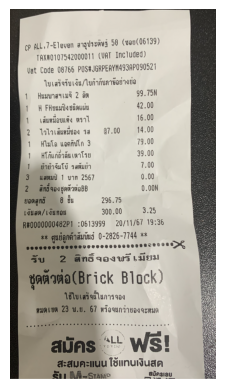

In [19]:
seven_bill = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/test_notebooks/test2/seven_bill.png"

disp_image(seven_bill)

In [22]:

question = "Did I buy milk? if so what is ths cost?"
base64_image = encode_image(seven_bill)
res = llama32pi(question, f"data:image/jpeg;base64,{base64_image}")
print(res)

**Yes**, you did buy milk. The receipt indicates that you purchased 2 liters of milk, which is listed as **99.75 THB**.


### OCR Total Cost calcualtion


In [23]:
seven_bill = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/test_notebooks/test2/seven_bill.png"


phone_bill = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/test_notebooks/test2/phone_bill.JPG"

rental_bill = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/test_notebooks/test2/rental_bill.png"



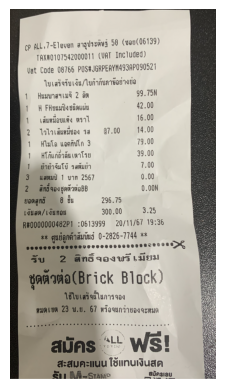

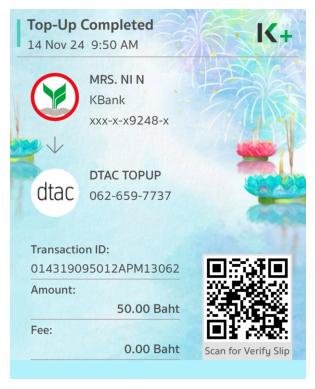

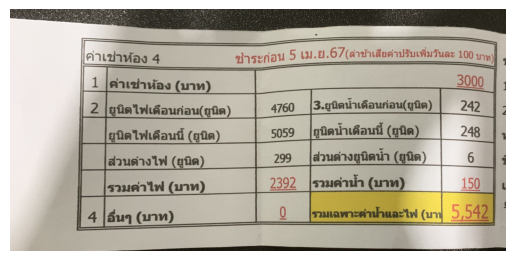

In [24]:
disp_image(seven_bill)
disp_image(phone_bill)
disp_image(rental_bill)

In [27]:
question = "What's the total charge in the receipt?"
base64_image1 = encode_image(seven_bill)
res1 = llama32pi(question, f"data:image/jpeg;base64,{base64_image1}")

base64_image2 = encode_image(phone_bill)
res2 = llama32pi(question, f"data:image/jpeg;base64,{base64_image2}")


base64_image3 = encode_image(rental_bill)
res3 = llama32pi(question, f"data:image/jpeg;base64,{base64_image3}")



In [28]:
results = res1+res2+res3
messages = [
    {"role": "user",
     "content": f"""What's the total charge of all the recipts below?
{results}"""
  }
]

response = llama32(messages)
print(response)

To find the total charge, I'll add up the amounts:

300 baht + 50.00 baht = 350.00 baht
350.00 baht + 5,542 baht = 5,892.00 baht

So, the total charge of all the receipts is 5,892.00 baht.
